# Universal Credit: Will it leave you better off? 

Universal Credit was designed to simplify the welfare system by combining six welfare components into one payment along with incentivising individuals on welfare to enter into work thus lowering the welfare bill for the government via a more efficient system and a higher number of people on welfare in the workforce, and reducing wage and employment scarring of claimants.

However it has come under much criticism for reasons such as the long wait to receive the first payment, the need for an address to receive payments, and the uncertainty in level of welfare recipients will receive when they are forced to switch onto the new system from the old benefits system.

What I aim to do with this project is to find how a claimants benefits will be affected when switching from the old system to Universal Credit, thus reducing the uncertainty a claimant will have. To simplify this project, as there are many different welfare sections, I will be looking at job seekers as despite not being from the UK it is the most relevant demographic to me at the moment, and determine, depending on a claimants current situation, the changes they should expect when switching systems. 

This will be done via the following steps:
1. Finding maximum entitlement of claimant seeking Universal Credit
2. Finding maximum entitlement of a claimant seeking Job Seekers Allowance
3. Find the general case
4. Include capital limits and current work situations
5. Create a visualization of how these entitlements change as a claimant enters into work

I will then conclude an mention further extensions of this project, and cite my work. 

(I do apologise the quality of this project has been reduced due to limited availability of information online regarding to welfare payments, a caveat that universal credit tried to solve but has fallen short.)


In [1159]:
import pandas as pd
import numpy as np

uc_df=pd.read_csv("Universal Credit - Sheet1.csv")
uc_df.head(5)

,Element,Unnamed: 1,2018-19 rates per month
0,Standard Allowance,Single claimant under 25,£251.77
1,NaN,Single claimant 25 and over,£317.82
2,NaN,"Joint claimants, both under 25",£395.20
3,NaN,"Joint claimants, either/both 25 and over",£498.89
4,Child Element,1st child or qualifying young person (if born ...,£277.08


Throughout this I will make some assumptions to simplify this data. I will currently ignore any capital, assume the individual is working 0 hours and drop sections that have combined values in them. This data is from entitled.to.

In [1160]:
uc_df['Element'].fillna(method='ffill',inplace=True)
uc_df_grouped=uc_df.groupby(['Element']).count()
uc_df_grouped.drop('Unnamed: 1',1,inplace=True)
uc_df_grouped.columns=['Number of Types']
uc_df_grouped.head(10)

,Number of Types
Element,
Additional amount for disabled child or qualifying young person,2
Capital limits,3
Carer element,1
Child Element,2
Childcare costs element,2
Higher work allowance (where the UC award does not contain any housing costs element),6
Limited capability for work,1
Limited capability for work & work related activity,1
Lower work allowance (where the UC award contains housing costs element),6


In [1161]:
uc_df_grouped.shape

(10, 1)

Thus we see that there are 10 different categories. For now I will drop Capital limits and Higher and Lower Work Allowances as this will be introduced later. 

In [1162]:
uc_df1=uc_df[uc_df['Element']!='Capital limits']
uc_df2=uc_df1[uc_df1['Element']!='Lower work allowance (where the UC award contains housing costs element)']
uc_df_simple=uc_df2[uc_df2['Element']!='Higher work allowance (where the UC award does not contain any housing costs element)']
#create new grouped matrix
uc_df_simple_group=uc_df_simple.groupby(['Element']).count()
uc_df_simple_group.drop(['Unnamed: 1'],1,inplace=True)

One of the major assumptions I am making for this project, is that the amount of universal credit is equal to the standard allowance plus extra entitlements that are listed below, ignoring the upper limits on claims and any interaction the claims may have with each other. 

In [1163]:
uc_df_simple_sorted=uc_df_simple.sort_values('Element').reset_index(drop=True)

I will set up the entitlement values as a vector and create unit vectors corresponding to a characteristic trait in order to allow us to choose which characteristics define the claimant and calculate their unique entitlement value.

In [1164]:
uc_df_simple_sortedX=uc_df_simple_sorted[['Element','Unnamed: 1']]
uc_df_simple_sortedY=(uc_df_simple_sorted[['2018-19 rates per month']])
uc_amounts=np.array(uc_df_simple_sortedY['2018-19 rates per month'].str.replace("£","").replace("''","").replace("1,108.04","1108.04"))
uc_amounts_t=uc_amounts.astype(float).T

In [1165]:
uc_vector=np.identity(13).astype(float)
np.dot(uc_amounts_t,uc_vector[3])

277.08

Now we can start combining different characteristics of a person using the uc_df_sorted_simple reference, where the index represents the Vectors[] number and we multiply by the uc_amounts_t. 

For example, take a person over 25 who is single with 2 children who has a disability that entitles them to a lower bracket of disability allowance. We take cases 0,3,4,10 into account as we can see from the table below.

In [1166]:
uc_df_simple_sortedX

,Element,Unnamed: 1
0,Additional amount for disabled child or qualif...,Lower rate
1,Additional amount for disabled child or qualif...,Higher rate
2,Carer element,NaN
3,Child Element,1st child or qualifying young person (if born ...
4,Child Element,2nd & subsequent child or qualifying young per...
5,Childcare costs element,Maximum amount of childcare costs for one chil...
6,Childcare costs element,Maximum amount for 2 or more children (UC pays...
7,Limited capability for work,(Only for claims started before 3 April 2017)
8,Limited capability for work & work related act...,NaN
9,Standard Allowance,Single claimant under 25


In [1167]:
UC=np.dot(uc_amounts_t,(uc_vector[0]+uc_vector[3]+uc_vector[4]+uc_vector[10]))
print("This person is entitled to: £%.2f per month" %UC)

This person is entitled to: £952.68 per month


# Job Seekers Allowance

The data that I am using here is from DWP 2015. 

In [1168]:
js_df=pd.read_csv("JobSeekers - Sheet1.csv")
js_df.head(5)

,Contribution Based,Person aged under 25 £57.90
0,NaN,Person aged under 25 £57.90
1,Income Based Personal Allowance Single,Aged 16 to 24 £57.90
2,NaN,Aged 25 or over £73.10
3,Couple,With both people aged 16 or 17 £57.90
4,NaN,"With both people aged 16 or 17, payable in cer..."


In [1169]:
js_df.columns
js_df.shape

(21, 2)

In [1170]:
js_df2=js_df.append({'Contribution Based':'Contribution Based','Person aged under 25 £57.90':'Person aged under 25 £57.90' },ignore_index=True)
js_df2['new']=range(1,len(js_df2)+1)
js_df2.loc[21,'new']=0
js_df3=js_df2
js_df3.sort_values(['new'],inplace=True) 
js_df4=js_df3.reset_index()
js_df4.drop('new',1,inplace=True)
js_df4.drop('index',1,inplace=True)
js_df4.columns=('Attribute','Characteristic')
js_df4['Attribute'].fillna(method='ffill',inplace=True)

In [1171]:
js_df4[['Char','Allowance']]=js_df4['Characteristic'].str.split('£',expand=True)
js_df4.drop('Characteristic',1,inplace=True)

In [1172]:
js_df4

,Attribute,Char,Allowance
0,Contribution Based,Person aged under 25,57.90
1,Contribution Based,Person aged under 25,57.90
2,Income Based Personal Allowance Single,Aged 16 to 24,57.90
3,Income Based Personal Allowance Single,Aged 25 or over,73.10
4,Couple,With both people aged 16 or 17,57.90
5,Couple,"With both people aged 16 or 17, payable in cer...",87.50
6,Couple,"With one person aged 16 or 17, and one person ...",57.90
7,Couple,"With one person aged 16 or 17, and one person ...",73.10
8,Couple,With both people aged 18 or over,114.85
9,Lone Parent,Aged under 18,57.90


In [1173]:
js_dfY=js_df4['Allowance'].astype(float)*(52/12)
js_vector=np.identity(22)

Now we have processed our data in a way that it can be used to calculate entitlements for a claimant. Again, here we take into assumption that the person is earning no wage, there is no benefit cap and all benefits are calculated through a linear process. We have also taken only one section of welfare benefits into consideration.

We will take into account the same scenario as before, a person over 25 who is single with 2 children who has a disability that entitles them to a lower bracket of disability allowance. This puts them into brackets [10],2*[11],[17]

In [1174]:
Job_Seeker=np.dot([js_dfY],(js_vector[10]+js_vector[11]*2+js_vector[17]))
print("This person is entitled to: £%.2f" %Job_Seeker)

This person is entitled to: £1036.32


In [1175]:
if UC<Job_Seeker:
    print("This person is worse off under Universal Credit by £%.2f per month" %abs(UC-Job_Seeker))
else:
    print("This person is better off under Universal Credi by £%.2f per month" %abs(UC-Jobs_Seeker))

This person is worse off under Universal Credit by £83.64 per month


# The General Case

As with all mathematics, we start with specific examples then create a formula to use for the general case, which I will create below using similar algorithms to the ones above but allowing for way to calculate any claimant.

For the Job Seeker Allowance case, enter in the row values of the claimant's attributes next to the letters given in the section below the chart, along with the number of children claimant has and the number of criteria the claimant has selected. Below are the row values to choose from. 

In [1176]:
js_df4[['Attribute','Char']]

,Attribute,Char
0,Contribution Based,Person aged under 25
1,Contribution Based,Person aged under 25
2,Income Based Personal Allowance Single,Aged 16 to 24
3,Income Based Personal Allowance Single,Aged 25 or over
4,Couple,With both people aged 16 or 17
5,Couple,"With both people aged 16 or 17, payable in cer..."
6,Couple,"With one person aged 16 or 17, and one person ..."
7,Couple,"With one person aged 16 or 17, and one person ..."
8,Couple,With both people aged 18 or over
9,Lone Parent,Aged under 18


I will now look at the case where we have a single mother of 2 children who is over 25 looking for work.

In [1177]:
a=3
b=10
c=11
d
e
Number_of_Children=2
Number_of_crit=3

Now we look at the Universal Credit Values from the table below and repeat the same process. 

In [1178]:
uc_df_simple_sortedX.columns=('Element','Type')
uc_df_simple_sortedX

,Element,Type
0,Additional amount for disabled child or qualif...,Lower rate
1,Additional amount for disabled child or qualif...,Higher rate
2,Carer element,NaN
3,Child Element,1st child or qualifying young person (if born ...
4,Child Element,2nd & subsequent child or qualifying young per...
5,Childcare costs element,Maximum amount of childcare costs for one chil...
6,Childcare costs element,Maximum amount for 2 or more children (UC pays...
7,Limited capability for work,(Only for claims started before 3 April 2017)
8,Limited capability for work & work related act...,NaN
9,Standard Allowance,Single claimant under 25


In [1179]:
A=9
B=3
C=4
D
E
F
Number_of_Children=2

number_of_crit=3

Now we create the general case algorithm to determine whether or not this person will be better or worse off.

In [1180]:
uc_vector[4]*=(Number_of_Children-1)

In [1181]:
uccriteria=[uc_vector[A],uc_vector[B],uc_vector[C],uc_vector[D],uc_vector[E],uc_vector[F]]
VectorUC=sum(uccriteria[0:number_of_crit+1])

In [1182]:
js_vector[11]*=Number_of_Children

In [1183]:
jscriteria=[js_vector[a],js_vector[b],js_vector[c],js_vector[d],js_vector[e]]
VectorJS=sum(jscriteria[0:Number_of_crit+1])

In [1184]:
Job_Seeker_Value=np.dot(js_dfY,VectorJS)
Universal_Credit_Value=np.dot(uc_amounts_t,VectorUC)
Difference=abs(Job_Seeker_Value-Universal_Credit_Value)

In [1185]:
if Job_Seeker_Value>Universal_Credit_Value:
    print('This person is worse off under Universal Credit by: £%.2f per month' %Difference )
else:
    print('This person is better off under Universal Credit by: £%.2f per month' %Difference)

This person is better off under Universal Credit by: £404.33 per month


# Extensions

We have taken under assumption that this person has no capital and works 0 hours a week, along with a few other assumptions which we will not address in this project. Here we will look into the case when the claimant may have capital and/or a job. We will assume that the claimant does not have a full time job and that job seekers allowance is not immediately removed one a part time job has been found, and that the entitlement value reduces at the same rate as other welfare payments, which is pound for pound. 

Under universal credit, the first £6000 of capital has no deductions but between £6000-£16000 UC will be reduced by £4.35 per any part of £250 of capital. After £16000 the claimant is no longer entitled to Universal Credit.

There is a constant taper rate under Universal Credit which is 63%. Below we will extend our model by including these two factors, we will enter in these details of the claimant in the box below. 

In [1186]:
#for example
capital=7100
wage=10
number_of_hours=17

In [1187]:
capital_deduction=np.ceil((Capital-6000)/250)*4.35
wage_deduction=wage*number_of_hours*0.63

In [1188]:
if capital<16000:
    deducted_uc=Universal_Credit_Value-wage_deduction-capital_deduction
else:
    deducted_uc=0

Under the old welfare system the welfare is reduce pound for pound of earnings. At 16 hours the Working Tax Credit sets in, with the value depending on your circumstances and at 30 hours a second amount of Working Tax Credit sets in. 

In [1189]:
wtc=pd.read_csv("working tax credits.csv")
wtc.head(5)

,"Basic element (1 per single person or couple) 1,960"
0,Couple element# (paid in addition to basic ele...
1,Lone parent element (paid in addition to basic...
2,30-hour element** (paid in addition to other e...
3,Disability element* (paid in addition to other...
4,Severe disability element* (paid in addition t...


In [1190]:
wtc=wtc.append({'Basic element (1 per single person or couple) 1,960':'Basic element (1 per single person or couple) 1,960'},ignore_index=True)
wtc2=wtc.drop(wtc.index[7]).reset_index()

In [1191]:
wtc2.columns=['index','Element Type']
wtc2.drop('index',1,inplace=True)

In [1192]:
wtc3=wtc2["Element Type"].str.replace("£",")").str.split(")",expand=True)
wtc3.columns=["Elements","Amounts"]
wtc3['Amounts']=wtc3['Amounts'].str.replace(",","").str.replace(" a week","")

In [1200]:
wtc3.head(3)

,Elements,Amounts
0,Couple element# (paid in addition to basic ele...,2010
1,Lone parent element (paid in addition to basic...,2010
2,30-hour element** (paid in addition to other e...,810


In [1193]:
Amounts_per_month=np.array(wtc3['Amounts']).astype(int)*(1,1,1,1,1,52,52,1)*(1/12)
Amounts_vector=np.identity(8)
wtc3[['Elements']]

,Elements
0,Couple element# (paid in addition to basic ele...
1,Lone parent element (paid in addition to basic...
2,30-hour element** (paid in addition to other e...
3,Disability element* (paid in addition to other...
4,Severe disability element* (paid in addition t...
5,"Childcare element, maximum eligible cost for f..."
6,"Childcare element, maximum eligible cost for f..."
7,Basic element (1 per single person or couple


Now we follow the same process as the general case where below you can enter the row number associated to your criteria and calculate the value of working tax credits you would be owed once you start working 16 hours per week.

In [1194]:
f=1
g=2
h=3
num_criteria=3

In [1195]:
wtccriteria=(Amounts_vector[f],Amounts_vector[g],Amounts_vector[h])
vectorwtc=sum(wtccriteria[0:num_criteria+1])
wtcvalue=np.dot(vectorwtc,Amounts_per_month)
thirtyhourvalue=np.dot(Amounts_vector[3],Amounts_per_month)

In [1196]:
if number_of_hours <16:
    deductedjs=Job_Seeker_Value-(number_of_hours*wage)
elif 16<=number_of_hours<30:
    deductedjs=Job_Seeker_Value-(number_of_hours*wage)+wtcvalue
else:
    deductedjs=Job_Seeker_Value-(number_of_hours*wage)+wtcvalue+np.dot(Amounts_vector[3]*wtcvalue)

In [1197]:
difference=abs(deductedjs-deducted_uc)

In [1198]:
if deductedjs>deducted_uc:
    print('This person is worse off under Universal Credit by: £%.2f per month' %difference )
else:
    print('This person is better off under Universal Credit by: £%.2f per month' %difference)

This person is worse off under Universal Credit by: £37.02 per month


# Visualization 

Here we will look at how Universal Credit and Job Seekers Allowance changes as number of hours at work changes. (Again we are assuming that we do not lose JSA once part time work is found and that it operates the same way as all other welfare type) 


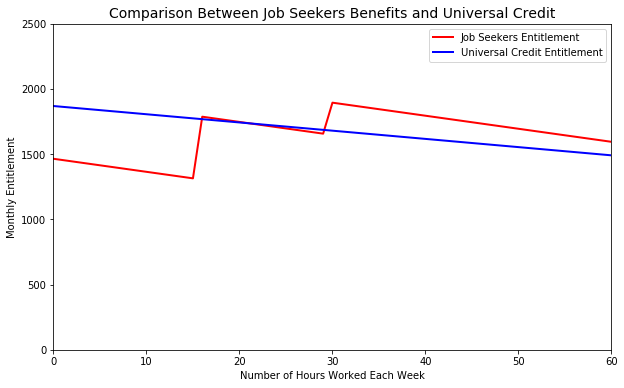

In [1199]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
plt.xlim(0,60)
plt.ylim(0,2500)
plt.title('Comparison Between Job Seekers Benefits and Universal Credit',fontsize='14')
plt.xlabel('Number of Hours Worked Each Week')
plt.ylabel('Monthly Entitlement')
x=np.arange(0,90)
y=Universal_Credit_Value-0.63*wage*x
def f(x):
    if x<16:
        return Job_Seeker_Value-wage*x;
    elif 16<=x<30:
        return Job_Seeker_Value+wtcvalue-wage*x;
    else:
        return Job_Seeker_Value+thirtyhourvalue-wage*x+wtcvalue

plt.plot(x,list(map(f,x)),color='r',linewidth=2,label='Job Seekers Entitlement')
plt.plot(x,y,color='b',linewidth=2,label='Universal Credit Entitlement')
plt.legend()
plt.show()

# Conclusion and Further Investigation

We can see from the graph above the points at which this specific claimant is be better or worse off under Universal Credit. We can also use to the code above to find out specifically how much a claimant will be entitled to and what the difference will be when they switch to Universal Credit and hence reducing the uncertainty around entitlement changes under Universal Credit, one of its many criticisms. 

We see however that this report does not give a perfect account for claimants as we have only considered one aspect of the old welfare system, when multiple claims are often made for different types of welfare entitlements for example income support, disability support, child support etc. In order to make this a much more accurate portrayal we would need to include all these different claims instead of focusing soley on Job Seekers Allowance. We would then need to find caps that are in place when multiple applications are in place. We also removed the housing element of Universal Credit, which would need to be added in to make the comparison fair as well as including the Universal Credit caps. 

To extend further we would need to look at taxation rates amongst those who are earning an income and how that affects their Universal Credit or welfare allowance. We would also want to look at how each of the different welfare types are reduced as the claimant enters into work and increases their hours, as it is most generally a pound for pound reduction but there are some circumstances where this isn't the case, and thus would need to be explored. 



# Work Cited

“A Guide to Child Tax Credit and Working Tax Credit.” Revenue Benefits , DWP, Apr. 2015, revenuebenefits.org.uk/pdf/WTC2-2015.pdf

“Benefit and Pension Rates.” DWP, 15 Jan. 2015, assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/457239/DWP11-benefit-and-pension-rates-april-2015-280815.pdf
